In [ ]:
import chess
import chess.uci
import chess.pgn
import sys
import numpy as np
import torch
import io
import pandas as pd
import concurrent
import dill
from extract_stockfish_label import *
%load_ext autoreload

%autoreload 2

In [ ]:
with open("chess_dataset.pkl",'rb') as file:
    out = dill.load(file)

In [ ]:
from chess_dataset import *

In [ ]:
fen,score,move = out[0]

In [ ]:
move2class(move)

In [ ]:
oh = np.zeros(64*64)
oh[move2class(move)]=1

In [ ]:
bh = oh.reshape(8,8,8,8)

In [ ]:
np.where(bh)

In [ ]:
move

In [ ]:
class2move(602)

In [ ]:
602//64,602%64

In [ ]:
9//8,9%8,26//8,26%8

In [ ]:
str(chr(1+ord('a')))

In [ ]:
b = chess.Board(fen)

In [1]:
import torch,dill
import matplotlib.pyplot as plt
from oil.utils.utils import Eval, cosLr

In [2]:
from gameTrainer2D import baseGameTrainTrial

In [3]:
Trial = baseGameTrainTrial(strict=True)

In [8]:
in_cfg ={
    'num_epochs':100,
    'bs': 392,
    'trainer_config':{'value_weight':.01,'log_args':{'minPeriod':0,'no_print':True}},
    'opt_constr':lambda params: torch.optim.Adam(params,lr=1e-3),
    'net_config':{'coords':True,'num_blocks':10,'k':96},
    'lr_sched':cosLr(1000),
}

In [9]:
cfg,outcome=Trial(in_cfg)

In [10]:
T = torch.load(cfg['saved_at'],pickle_module=dill)
T.logger.scalar_frame

,Minibatch_Loss,Train_Acc,Train_MSE,lr0
2,3.417515,0.045918,0.116057,0.001000
14,2.817967,0.224490,0.090555,0.001000
26,2.267315,0.397959,0.196080,0.000999
38,1.393151,0.663265,0.062242,0.000997
50,0.299989,0.959184,0.056090,0.000994
62,0.036952,0.989796,0.036113,0.000991
74,0.018629,0.989796,0.021283,0.000987
86,0.016396,0.989796,0.003532,0.000983
98,0.015250,0.989796,0.001123,0.000977
101,NaN,0.989796,0.000880,0.000976


<Figure size 432x288 with 0 Axes>

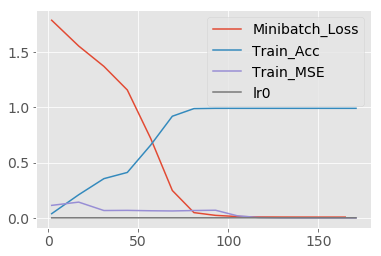

In [7]:
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 14})
f = plt.figure()
T.logger.scalar_frame.plot()

In [ ]:
from chess_dataset import ChessDataset
import os
import torch
from torch.utils.data import DataLoader
from oil.utils.utils import to_device_layer,LoaderTo,Eval
import numpy as np

In [ ]:
D = ChessDataset(os.path.expanduser('~/games/chess/chess_train.pkl'))

In [ ]:
vs = np.array([D[i][2] for i in range(300)])

In [ ]:
plt.hist(vs)

In [ ]:
vs.mean()

In [ ]:
loader = LoaderTo(DataLoader(D,batch_size=5,shuffle=False),torch.device('cuda'))

In [ ]:
with Eval(T.model), torch.no_grad():
    values = np.concatenate([T.model(mb[0])[0].cpu().data.numpy() for mb in loader])

In [ ]:
values.mean()

In [ ]:
plt.hist(values)

In [ ]:
vs2 = np.array()

In [ ]:
vs2

In [ ]:
mb[2].type()